In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.simplefilter('ignore')

In [2]:
df_train=pd.read_csv('train_house.csv', index_col='Id')
df_test=pd.read_csv('test_house.csv', index_col='Id')
submission=pd.read_csv('sample_submission.csv', index_col='Id')
data=df_train
print(df_train.shape, df_test.shape, submission.shape)

(1460, 80) (1459, 79) (1459, 1)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

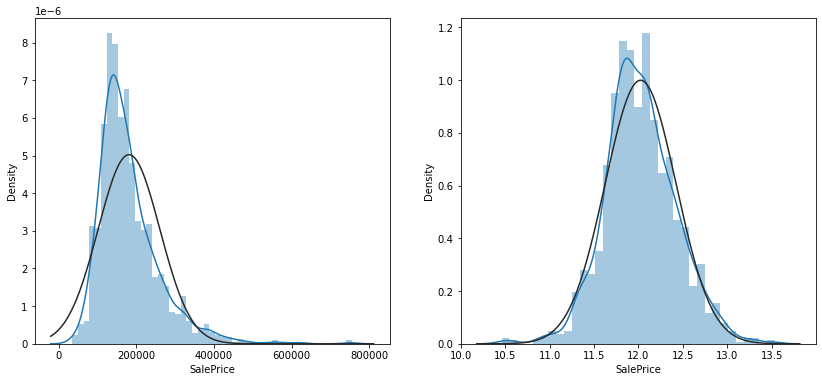

In [3]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(14,6)
sns.distplot(data['SalePrice'], fit=norm, ax=ax1)
sns.distplot(np.log(data['SalePrice']+1), fit=norm, ax=ax2)

<AxesSubplot:>

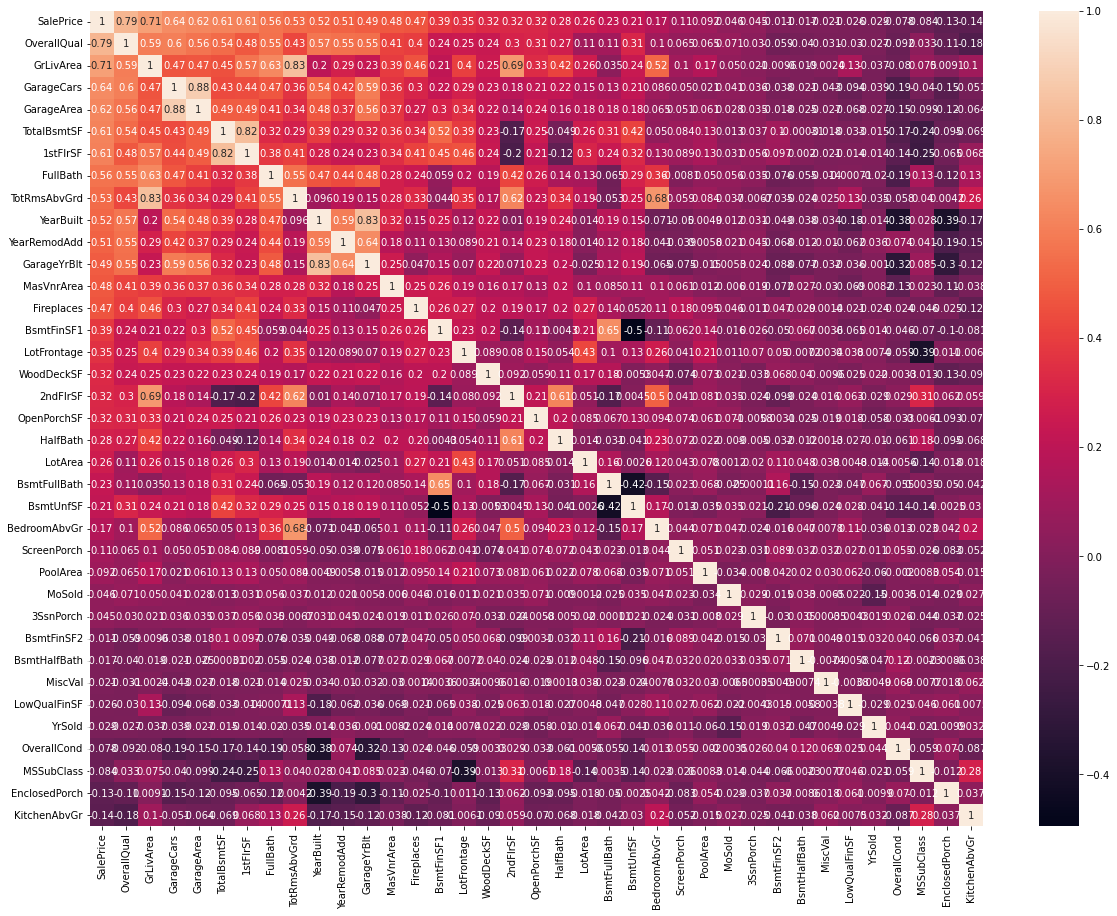

In [4]:
corr = df_train.corr()
top_corr = df_train[corr.nlargest(40,'SalePrice')['SalePrice'].index].corr()
figure, ax1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(20,15)
sns.heatmap(top_corr, annot=True, ax=ax1)

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

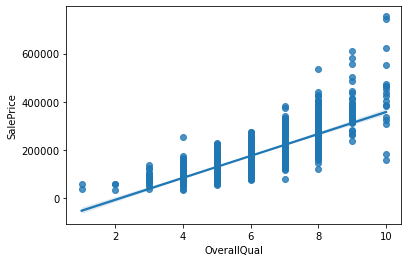

In [5]:
sns.regplot(df_train['OverallQual'], df_train['SalePrice']) # 전체적인 재료 및 마감 등급

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

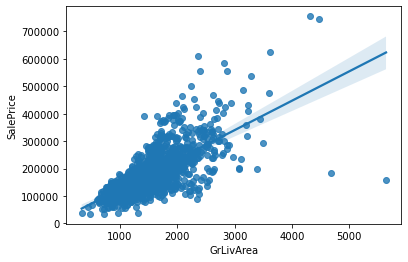

In [6]:
sns.regplot(df_train['GrLivArea'], df_train['SalePrice']) # 지상거실 면적 평방 피트

In [7]:
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<700000)].index)
# Outlier 4개값 제거 df_train['GrLivArea']>4000 2개 & df_train['SalePrice']<7000000 2개

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

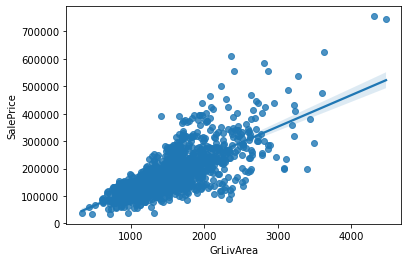

In [8]:
sns.regplot(df_train['GrLivArea'], df_train['SalePrice']) # 지상거실 면적 평방 피트

In [9]:
y_train = df_train['SalePrice']
df_train = df_train[list(df_test)]
all_data = pd.concat((df_train, df_test), axis=0)
print(all_data.shape)
y_train = np.log(y_train+1)

'''
타겟 변수를 미리 Ytrain으로 빼서 저장하고 위에서 말한듯이 로그를 씌웠다.
로그를 씌우는데 +1 을 해주는 이유는 log0 의 값이 없기 때문이다. 
공짜 집은 없겠지만 만약 Ytrain의 값중 하나가 0이라면..?
log0은 마이너스 무한대로 커지기 때문에 +1씩 해주어서 이를 방지한다. 이를 'log1p' 라고 하기도 한다. 
'''

(2917, 79)


"\n타겟 변수를 미리 Ytrain으로 빼서 저장하고 위에서 말한듯이 로그를 씌웠다.\n로그를 씌우는데 +1 을 해주는 이유는 log0 의 값이 없기 때문이다. \n공짜 집은 없겠지만 만약 Ytrain의 값중 하나가 0이라면..?\nlog0은 마이너스 무한대로 커지기 때문에 +1씩 해주어서 이를 방지한다. 이를 'log1p' 라고 하기도 한다. \n"

In [8]:
cols = list(all_data)
for col in list(all_data):
    if (all_data[col].isnull().sum())==0:
        cols.remove(col)
    else:
        pass
print(cols)

'''
이 데이터는 사실 상당히 깔끔하지만, 막상 꺼내어 보면 결측치가 참 많이 있다.
이는 캐글에서 데이터를 다운로드 받을 때 같이 딸려오는 'data description.txt' 파일을 읽어보면, 집에 해당 시설물이 없는 경우는
결측치로 처리되어 있음을 알 수 있다.
물론 중간에는 진짜 결측지도 있겠지만, 없는 경우가 더 많다. 따라서 결측치를 처리하는 방법이 매우 간단하다.
list(all_data) 를 사용하면 all_data 라는 데이터프레임의 열 이름을 리스트로 만들 수 있다.
다음 코드는 반복문을 통해서 all_data 에서 해당 열에 결측치가 없으면 리스트에서 그 열의 이름을 지운다. 
그러면 남은 리스트에는 결측치가 있는 변수 이름만 남아있을 것이다.
print 문으로 출력해보면 아래 코드에 있는 이름들이 나올 것이다
'''

['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType']


"\n이 데이터는 사실 상당히 깔끔하지만, 막상 꺼내어 보면 결측치가 참 많이 있다.\n이는 캐글에서 데이터를 다운로드 받을 때 같이 딸려오는 'data description.txt' 파일을 읽어보면, 집에 해당 시설물이 없는 경우는\n결측치로 처리되어 있음을 알 수 있다.\n물론 중간에는 진짜 결측지도 있겠지만, 없는 경우가 더 많다. 따라서 결측치를 처리하는 방법이 매우 간단하다.\nlist(all_data) 를 사용하면 all_data 라는 데이터프레임의 열 이름을 리스트로 만들 수 있다.\n다음 코드는 반복문을 통해서 all_data 에서 해당 열에 결측치가 없으면 리스트에서 그 열의 이름을 지운다. \n그러면 남은 리스트에는 결측치가 있는 변수 이름만 남아있을 것이다.\nprint 문으로 출력해보면 아래 코드에 있는 이름들이 나올 것이다\n"

In [9]:
for col in ('PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType', 'MSSubClass'):
    all_data[col] = all_data[col].fillna('None') # fillna 메소드 - 결측치 채우기
# 집에 해당 시설물이 없는 경우(범주형 변수) 결측치를 'None' 이라는 문자열로 채운다.

for col in ('GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea','LotFrontage'):
    all_data[col] = all_data[col].fillna(0)
# 집에 해당 시설물이 없는 경우(수치형 변수) 결측치를 0으로 채운다. 차고면적=0 이면 차고 없음 이런식으로 생각할 수 있다.

for col in ('MSZoning', 'Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType', 'Functional', 'Utilities'):
    all_data[col] = all_data[col].fillna(all_data[col].mode()[0])
# 집에 해당 시설물이 없다고 보기 힘든 경우 있는 결측치, 이때는 결측치를 해당 열의 최빈값(최대 빈도수 값)으로 채운다. 집에 외벽시설이 있을리는 없고, 집이 판매가 되었는데, 거래 타입이 정해지지 않을리는 없다.

"\n몇개의 새로운 변수들을 만들어보자면, 지하실 1,2층 면적을 모두 합한 '총 면적'이란 변수를 추가로 만들어준다.\n오른쪽 아래에 있는 그래프가 나머지 3개를 합한 면적을 나타낸 그래프인데, 상당히 타겟변수를 잘 설명할 수 있다.\n상관관계도 꽤 높아보인다. 이는 총 면적이 증가하면, 집값이 더 비싸진다고 볼 수 있다.\n이들을 더해서 'TotalSF' 라는 이름으로 저장해준다.\n"

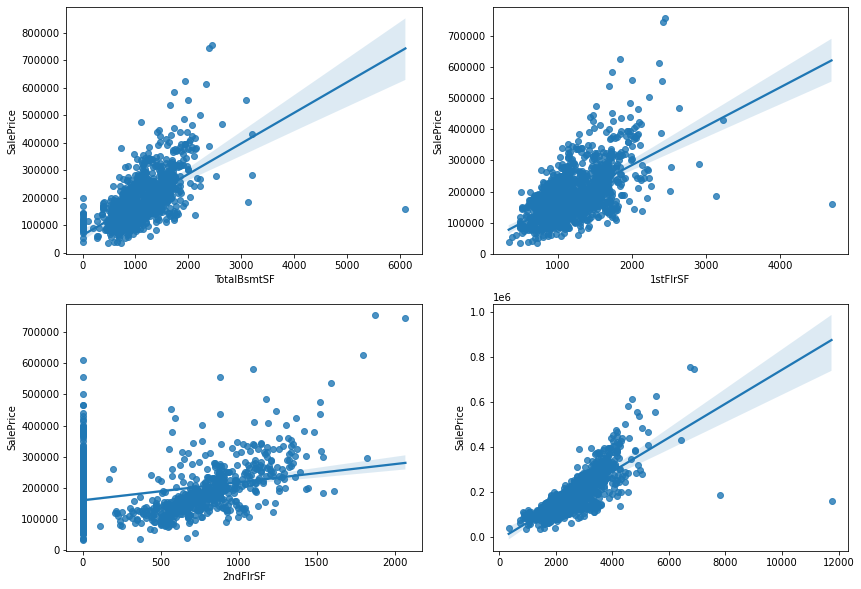

In [10]:
# 총 가용면적 (Total SF Available)
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(14, 10)
sns.regplot(all_data['TotalBsmtSF'], all_data['SalePrice'], ax=ax1)
sns.regplot(all_data['1stFlrSF'], all_data['SalePrice'], ax=ax2)
sns.regplot(all_data['2ndFlrSF'], all_data['SalePrice'], ax=ax3)
sns.regplot(all_data['TotalSF'], all_data['SalePrice'], ax=ax4)
'''
몇개의 새로운 변수들을 만들어보자면, 지하실 1,2층 면적을 모두 합한 '총 면적'이란 변수를 추가로 만들어준다.
오른쪽 아래에 있는 그래프가 나머지 3개를 합한 면적을 나타낸 그래프인데, 상당히 타겟변수를 잘 설명할 수 있다.
상관관계도 꽤 높아보인다. 이는 총 면적이 증가하면, 집값이 더 비싸진다고 볼 수 있다.
이들을 더해서 'TotalSF' 라는 이름으로 저장해준다.
'''

In [11]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']
all_data['No2ndFlr'] = (all_data['2ndFlrSF'] == 0)
all_data['NoBsmt'] = (all_data['TotalBsmtSF'] == 0)

'''
TotalSF - 지하실 면적을 모두 합친 변수
No2ndFlr - 2층 없음
NOBsmt - 지하실 없음
2층 면적과 총 지하실 면적을 나타내는 그래프를 보면, 나타나있는 그래프와 별로 맞지 않는다. 
아마 0의 값이 몰려있어 0을 따로 분리한다면 어느정도 맞지 않을까 하는 생각할 수 있다.
'''

'\nTotalSF - 지하실 면적을 모두 합친 변수\nNo2ndFlr - 2층 없음\nNOBsmt - 지하실 없음\n2층 면적과 총 지하실 면적을 나타내는 그래프를 보면, 나타나있는 그래프와 별로 맞지 않는다. \n아마 0의 값이 몰려있어 0을 따로 분리한다면 어느정도 맞지 않을까 하는 생각할 수 있다.\n'

"\n욕실 갯수는 'FullBath' 와 'HalfBath', 그리고 지하에 있는지 여부, 총 4개 열로 이루어져있었는데, 이들을 모두 더해 하나로 만들어 보았다.\nFullBath 는 욕조 및 샤워 시설이 포함되어있는 욕실이고, HalfBath는 변기와 세면대 정도 있는 간단한 욕실을 말한다.\n이름에 맞게 FullBath는 1개로 카운트하고, HalfBath 는 0.5개로 카운트해서 모두 더했더니 다음과 같은 그래프를 얻을 수 있었다.\n욕실 수가 많을 수록 집값(SalePrice)이 더 비싸진다.(큰 집일 수록 욕실수가 많을 것 같다는 생각)\n하지만 여기서 특이한 점이 하나 있는데, 욕실 갯수가 5, 6개인 집들은 막대그래프에 검정선이 보이지 않는다.\n이게뭐지? 할 수도 있지만, 검정 선은 편차를 의미한다.\n"

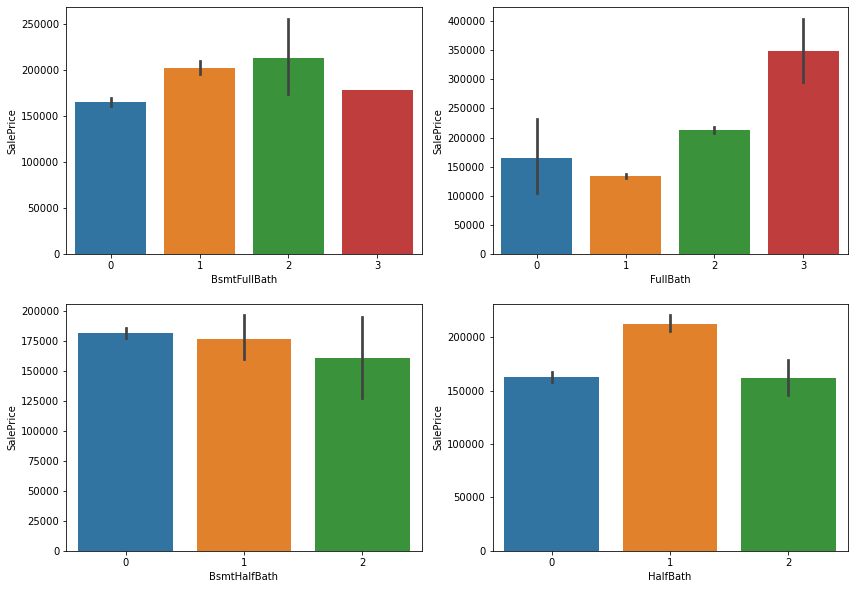

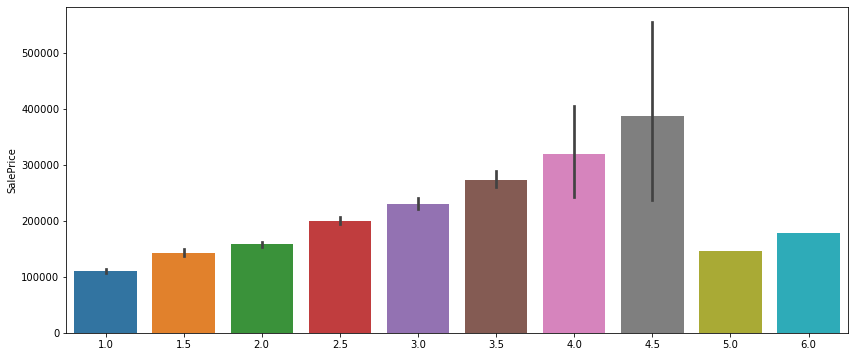

In [12]:
# 총 욕실 수 (Bath)

figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(14,10)
sns.barplot(data['BsmtFullBath'], data['SalePrice'], ax=ax1)
sns.barplot(data['FullBath'], data['SalePrice'], ax=ax2)
sns.barplot(data['BsmtHalfBath'], data['SalePrice'], ax=ax3)
sns.barplot(data['HalfBath'], data['SalePrice'], ax=ax4)

figure, (ax5) = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(14,6)
sns.barplot(data['BsmtFullBath'] + data['FullBath'] + (data['BsmtHalfBath']/2) + (data['HalfBath']/2), data['SalePrice'], ax=ax5)
'''
욕실 갯수는 'FullBath' 와 'HalfBath', 그리고 지하에 있는지 여부, 총 4개 열로 이루어져있었는데, 이들을 모두 더해 하나로 만들어 보았다.
FullBath 는 욕조 및 샤워 시설이 포함되어있는 욕실이고, HalfBath는 변기와 세면대 정도 있는 간단한 욕실을 말한다.
이름에 맞게 FullBath는 1개로 카운트하고, HalfBath 는 0.5개로 카운트해서 모두 더했더니 다음과 같은 그래프를 얻을 수 있었다.
욕실 수가 많을 수록 집값(SalePrice)이 더 비싸진다.(큰 집일 수록 욕실수가 많을 것 같다는 생각)
하지만 여기서 특이한 점이 하나 있는데, 욕실 갯수가 5, 6개인 집들은 막대그래프에 검정선이 보이지 않는다.
이게뭐지? 할 수도 있지만, 검정 선은 편차를 의미한다.
'''

In [13]:
all_data['TotalBath']=all_data['BsmtFullBath'] + all_data['FullBath'] + (all_data['BsmtHalfBath']/2) + (all_data['HalfBath']/2)
'''
그렇다면 편차가 없다는것이 무슨뜻이지? 값이 다른 데이터가 두개만 있어도 편차가 발생할텐데?
화장실 갯수가 5개, 6개인 집은 각각 하나씩밖에 없다는 뜻으로 볼 수 있다.
이들은 역시 outlier 로 판단하고 지워도 상관이 없다.
'''

'\n그렇다면 편차가 없다는것이 무슨뜻이지? 값이 다른 데이터가 두개만 있어도 편차가 발생할텐데?\n화장실 갯수가 5개, 6개인 집은 각각 하나씩밖에 없다는 뜻으로 볼 수 있다.\n이들은 역시 outlier 로 판단하고 지워도 상관이 없다.\n'

"\n건축 연도와 리모델링 연도의 평균을 구하는 것이 무슨 의미가 있난 할 수도 있찌만, 아주 의미가 없지는 않다.\n건축 연도가 오래 되었어도, 최근에 리모델링을 했으면 집값이 높게 나왔을 것이고, 건축 이후 리모델링을 하지 않았다면,\n집값이 아주 낮게 나왔을 것이다. 따라서 이 값이 높은 집들은 '지어진지 얼마 되지 않은 신축 건물 + 최근에 리모델링까지 함'에\n가깝고, 이 값이 낮은 집들은 '오래된 건물 + 리모델링도 안함'에 가까울 것이다. 그리고 이는 집값이 유의미한 영향이 있다는 것을\n세번째 그래프에서 알 수 있다.\n"

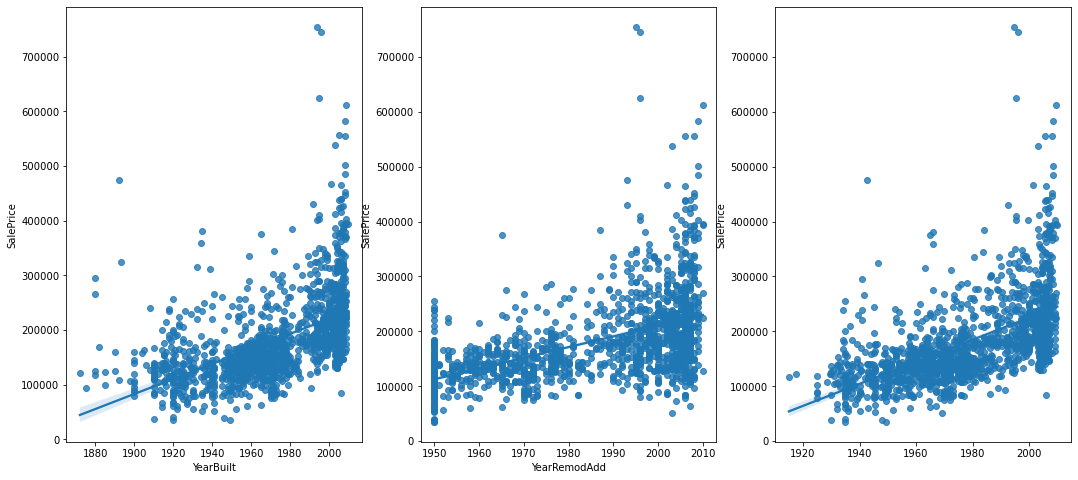

In [14]:
# 건축연도 + 리모델링 연도 (Year Built and Remodeled)

figure, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
figure.set_size_inches(18,8)
sns.regplot(data['YearBuilt'], data['SalePrice'], ax=ax1)
sns.regplot(data['YearRemodAdd'], data['SalePrice'], ax=ax2)
sns.regplot((data['YearBuilt']+data['YearRemodAdd'])/2, data['SalePrice'], ax=ax3) #'/2' for graph scaling
'''
건축 연도와 리모델링 연도의 평균을 구하는 것이 무슨 의미가 있난 할 수도 있찌만, 아주 의미가 없지는 않다.
건축 연도가 오래 되었어도, 최근에 리모델링을 했으면 집값이 높게 나왔을 것이고, 건축 이후 리모델링을 하지 않았다면,
집값이 아주 낮게 나왔을 것이다. 따라서 이 값이 높은 집들은 '지어진지 얼마 되지 않은 신축 건물 + 최근에 리모델링까지 함'에
가깝고, 이 값이 낮은 집들은 '오래된 건물 + 리모델링도 안함'에 가까울 것이다. 그리고 이는 집값이 유의미한 영향이 있다는 것을
세번째 그래프에서 알 수 있다.
'''


In [15]:
all_data['YrBltAndRemod'] = all_data['YearBuilt'] + all_data['YearRemodAdd']
# 이를 'YrBltRemod' 라는 이름으로 두 개의 변수를 저장하자.

In [16]:
all_data['MSSubClass'] = all_data['MSSubClass'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)

'''
데이터 설명을 보면 나와있지만 'MSSubClass'는 사실 숫자로 이루어진 데이터지만, 각각의 숫자가 의미를 갖고있는
범주형 변수이다. 그리고 판매 연, 월, 역시 연산개념을 적용하는데 무리가 있다.
'''

"\n데이터 설명을 보면 나와있지만 'MSSubClass'는 사실 숫자로 이루어진 데이터지만, 각각의 숫자가 의미를 갖고있는\n범주형 변수이다. 그리고 판매 연, 월, 역시 연산개념을 적용하는데 무리가 있다.\n"

In [17]:
# 지하실 점수 (Bsmt)

Basement = ['BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'BsmtUnfSF', 'TotalBsmtSF']
Bsmt = all_data[Basement]

# 지하실에 관련된 변수들을 묶어서 저장한다.

In [18]:
Bsmt=Bsmt.replace(to_replace='Po', value=1)
Bsmt=Bsmt.replace(to_replace='Fa', value=2)
Bsmt=Bsmt.replace(to_replace='TA', value=3)
Bsmt=Bsmt.replace(to_replace='Gd', value=4)
Bsmt=Bsmt.replace(to_replace='Ex', value=5)
Bsmt=Bsmt.replace(to_replace='None', value=0)

Bsmt=Bsmt.replace(to_replace='No', value=1)
Bsmt=Bsmt.replace(to_replace='Mn', value=2)
Bsmt=Bsmt.replace(to_replace='Av', value=3)
Bsmt=Bsmt.replace(to_replace='Gd', value=4)

Bsmt=Bsmt.replace(to_replace='Unf', value=1)
Bsmt=Bsmt.replace(to_replace='LwQ', value=2)
Bsmt=Bsmt.replace(to_replace='Rec', value=3)
Bsmt=Bsmt.replace(to_replace='BLQ', value=4)
Bsmt=Bsmt.replace(to_replace='ALQ', value=5)
Bsmt=Bsmt.replace(to_replace='GLQ', value=6)

'''
One - hot Encoding을 해준다. 'Po','Fa', 'TA'... 값은 data description 텍스트 파일에 나와있다.
따라서 순서대로 좋은 값부터 안좋은 값까지 가중치를 매겨준다. 지하실이 없으면 0을 입력해준다.
'''

"\nOne - hot Encoding을 해준다. 'Po','Fa', 'TA'... 값은 data description 텍스트 파일에 나와있다.\n따라서 순서대로 좋은 값부터 안좋은 값까지 가중치를 매겨준다. 지하실이 없으면 0을 입력해준다.\n"

In [19]:
Bsmt['BsmtScore'] = Bsmt['BsmtQual'] * Bsmt['BsmtCond'] * Bsmt['TotalBsmtSF']
all_data['BsmtScore'] = Bsmt['BsmtScore']

Bsmt['BsmtFin'] = (Bsmt['BsmtFinSF1'] * Bsmt['BsmtFinType1']) + (Bsmt['BsmtFinSF2'] * Bsmt['BsmtFinType2'])
all_data['BsmtFinScore'] = Bsmt['BsmtFin']
all_data['BsmtDNF'] = (all_data['BsmtFinScore'] == 0)

'''
그리고 몇개 항목들을 곱해서 'BsmtScore' 항목을 만들어 지하실의 전반적인 상태를 복합적으로 평가할 수 있는 변수를
만들었다. 'BsmtFin' 변수는 지하실이 공사중이라면, 완성 면적과 상태를 포함하는 변수이다.

'BsmtFinScore'은 지하실의 완성도 점수, 'BsmtScore'은 지하실의 종합 점수, 'BsmtDNF'는 지하실의 미완성 여부를
나타내는 변수이다.
'''

"\n그리고 몇개 항목들을 곱해서 'BsmtScore' 항목을 만들어 지하실의 전반적인 상태를 복합적으로 평가할 수 있는 변수를\n만들었다. 'BsmtFin' 변수는 지하실이 공사중이라면, 완성 면적과 상태를 포함하는 변수이다.\n\n'BsmtFinScore'은 지하실의 완성도 점수, 'BsmtScore'은 지하실의 종합 점수, 'BsmtDNF'는 지하실의 미완성 여부를\n나타내는 변수이다.\n"

In [20]:
# 토지 점수 (Lot)

lot=['LotFrontage', 'LotArea','LotConfig','LotShape']
Lot=all_data[lot]

Lot['LotScore'] = np.log((Lot['LotFrontage'] * Lot['LotArea'])+1)

all_data['LotScore']=Lot['LotScore']

'''비슷한 상태도 토지면적과 모양, 접근성 등등을 고려할 수 있는 점수를 만들어 'LotScore'로 저장했다.'''

"비슷한 상태도 토지면적과 모양, 접근성 등등을 고려할 수 있는 점수를 만들어 'LotScore'로 저장했다."

In [21]:
# 차고 점수 (Garage)

garage = ['GarageArea', 'GarageCars', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt']
Garage = all_data[garage]
all_data['Nogarage'] = (all_data['GarageArea']==0)

Garage=Garage.replace(to_replace='Po', value=1)
Garage=Garage.replace(to_replace='Fa', value=2)
Garage=Garage.replace(to_replace='TA', value=3)
Garage=Garage.replace(to_replace='Gd', value=4)
Garage=Garage.replace(to_replace='Ex', value=5)
Garage=Garage.replace(to_replace='None', value=0)

Garage=Garage.replace(to_replace='Unf', value=1)
Garage=Garage.replace(to_replace='RFn', value=2)
Garage=Garage.replace(to_replace='Fin', value=3)

Garage=Garage.replace(to_replace='CarPort', value=1)
Garage=Garage.replace(to_replace='Basment', value=4)
Garage=Garage.replace(to_replace='Detchd', value=2)
Garage=Garage.replace(to_replace='2Types', value=3)
Garage=Garage.replace(to_replace='Basement', value=5)
Garage=Garage.replace(to_replace='Attchd', value=6)
Garage=Garage.replace(to_replace='BuiltIn', value=7)
Garage['GarageScore']=(Garage['GarageArea']) * (Garage['GarageCars']) * (Garage['GarageFinish']) * (Garage['GarageQual']) * (Garage['GarageType'])
all_data['GarageScore']=Garage['GarageScore']

'''차고에 관해서도 같은 방법으로 실행하고, 'GarageScroe' 변수로 차고의 종합 점수를 판단할 수 있도록 했다.'''

"차고에 관해서도 같은 방법으로 실행하고, 'GarageScroe' 변수로 차고의 종합 점수를 판단할 수 있도록 했다."

In [22]:
# 기타 변수

all_data = all_data.drop(columns=['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating'])
# 비정상적으로 하나의 값만 많은 변수들 삭제

'\n비 정상적으로 빈 값이 많은 변수들 삭제\n집에 수영장이 있는 집은 몇입 안되기 때문이다. 그래프를 띄워서 확인해본다.\n'

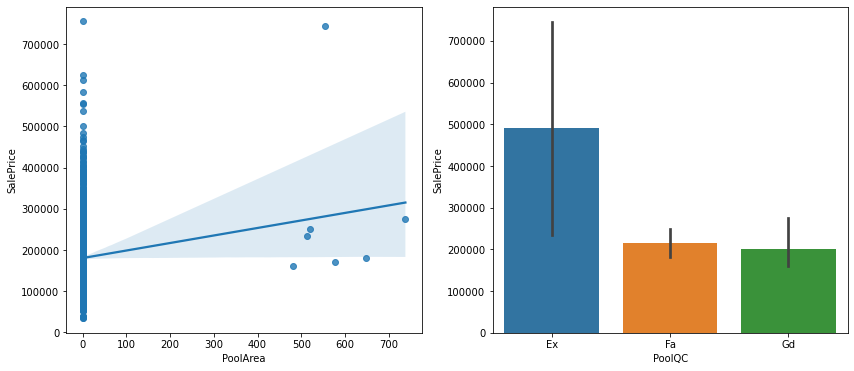

In [23]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(14,6)
sns.regplot(data=data, x='PoolArea', y='SalePrice', ax=ax1)
sns.barplot(data=data, x='PoolQC', y='SalePrice', ax=ax2)

all_data = all_data.drop(columns=['PoolArea', 'PoolQC'])

'''
비 정상적으로 빈 값이 많은 변수들 삭제
집에 수영장이 있는 집은 몇입 안되기 때문이다. 그래프를 띄워서 확인해본다.
'''

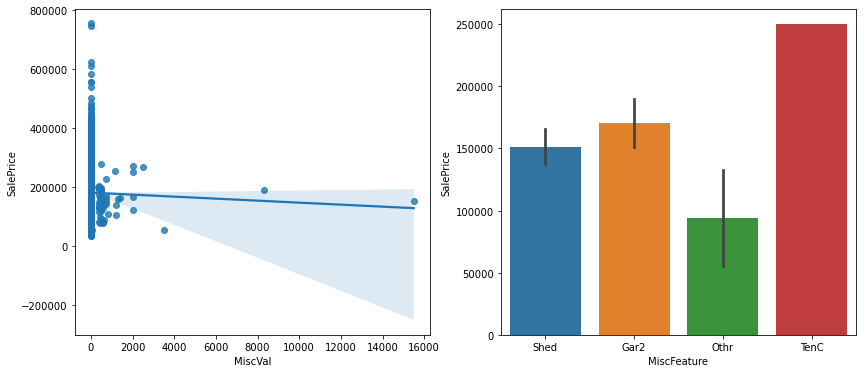

In [24]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(14,6)
sns.regplot(data=data, x='MiscVal', y='SalePrice', ax=ax1)
sns.barplot(data=data, x='MiscFeature', y='SalePrice', ax=ax2)

all_data = all_data.drop(columns=['MiscVal', 'MiscFeature'])

# 테니스 코트가 있는 집은 그나마 괜찮게 보여진다.

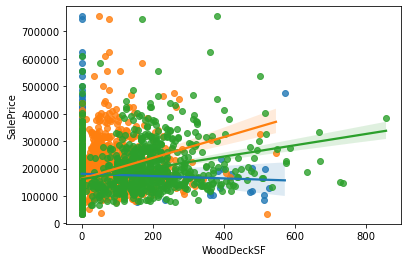

In [25]:
sns.regplot(data=data, x='LowQualFinSF', y='SalePrice')
sns.regplot(data=data, x='OpenPorchSF', y='SalePrice')
sns.regplot(data=data, x='WoodDeckSF', y='SalePrice')

# (채워진)결측치가 많은 경우, 이들은 0값만 분리해준다.

all_data['NoLowQual'] = (all_data['LowQualFinSF']==0)
all_data['NoOpenPorch'] = (all_data['OpenPorchSF']==0)
all_data['NoWoodDeck'] = (all_data['WoodDeckSF']==0)

In [26]:
# 전처리 
# 범주형 변수(Categorical Feature)
categorical_feature=all_data.select_dtypes(np.object)

def onehot(col_list):
    global all_data
    while len(col_list) !=0:
        col=col_list.pop(0)
        data_encoded=pd.get_dummies(all_data[col], prefix=col)
        all_data=pd.merge(all_data, data_encoded, on='Id')
        all_data=all_data.drop(columns=col)
    print(all_data.shape)
    
onehot(list(categorical_feature))

'''
범주형 변수가 상당히 많은 데이터셋이다. 범주형 변수를 다짜고짜 1,2,3,4... 로 인코딩해준다면 머신러닝 학습중
오해할 소지가 많기때문에 일단 모조리 onehot encoding을 해준다.
'''

(2917, 309)


'\n범주형 변수가 상당히 많은 데이터셋이다. 범주형 변수를 다짜고짜 1,2,3,4... 로 인코딩해준다면 머신러닝 학습중\n오해할 소지가 많기때문에 일단 모조리 onehot encoding을 해준다.\n'

In [27]:
# 전처리
# 수치형 변수(Numeric Feature)

numeric_feature = all_data.select_dtypes(np.number)

def log_transform(col_list):
    transformed_col=[]
    while len(col_list)!=0:
        col=col_list.pop(0)
        if all_data[col].skew() > 0.5:
            all_data[col]=np.log(all_data[col]+1)
            transformed_col.append(col)
        else:
            pass
    print(f"{len(transformed_col)} features had been tranformed")
    print(all_data.shape)

log_transform(list(numeric_feature))

''' 
수치형 변수는 비대칭이 너무 심해지지 않게끔, Right Skewed가 크게 되어있는 데이터들에만 로그를 씌워 적절히 변형시켜준다.
'''

255 features had been tranformed
(2917, 309)


' \n수치형 변수는 비대칭이 너무 심해지지 않게끔, Right Skewed가 크게 되어있는 데이터들에만 로그를 씌워 적절히 변형시켜준다.\n'

In [28]:
print(df_train.shape, df_test.shape)
X_train = all_data[:len(df_train)]
X_test = all_data[len(df_train):]
print(X_train.shape, X_test.shape)

'''
그럼 이제 데이터를 나눠주어야 하는데, all_data 항목을 df_test 데이터의 갯수에 맞게끔 잘라서 따로 저장하면 된다.
원래 df_train 데이터의 갯수와 데이터를 가공한 X_train 데이터의 갯수가 1458개로 동일하다. (위에서 'GrLivArea' 할때 지워주었다.)
'''

(1458, 79) (1459, 79)
(1458, 309) (1459, 309)


"\n그럼 이제 데이터를 나눠주어야 하는데, all_data 항목을 df_test 데이터의 갯수에 맞게끔 잘라서 따로 저장하면 된다.\n원래 df_train 데이터의 갯수와 데이터를 가공한 X_train 데이터의 갯수가 1458개로 동일하다. (위에서 'GrLivArea' 할때 지워주었다.)\n"

In [29]:
# 머신러닝 모델로 학습 # AutoML 가능

from sklearn.linear_model import ElasticNet, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [33]:
model = XGBRegressor()

In [34]:
model.fit(X_train, y_train)
XGB_prediction = model.predict(X_test)
prediction = np.exp(XGB_prediction) - 1
print(prediction[:10])

[123070.52 158093.34 193824.61 193550.3  186226.02 169860.22 173886.53
 164989.83 180098.02 127684.58]


In [35]:
submission['SalePrice'] = prediction
submission.to_csv('Result.csv')

# score 0.14373 - 2021 / 4262